In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Create an empty graph object with no nodes and edges.
G = nx.Graph() # DiGraph, MultiGraph, MultiDiGraph

In [3]:
## Add nodes to our graph object
# In NetworkX, nodes can be any hashable object e.g. a text string, an image,
# an XML object, another Graph, a customized node object, etc.

G.add_node('1')
G.add_node(1)
G.add_node('second')

In [4]:
G.nodes()

NodeView(('1', 1, 'second'))

In [5]:
# G.add_node({'dictionary': 'will throw error'})
# G.add_node([1, 2])

In [6]:
G.nodes()

NodeView(('1', 1, 'second'))

In [7]:
list_of_nodes = [1, 2, 3, 'node4']
G.add_nodes_from(list_of_nodes)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4']


[0, 1, 2, 3, 4, 5, 6]


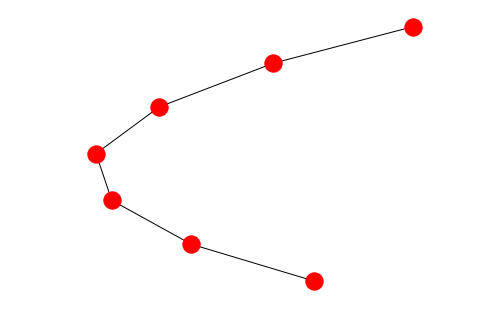

In [8]:
# NetworkX has a lot of graph generators path_graph is one of them.
H = nx.path_graph(7)
print(H.nodes())
nx.draw(H)

Difference between `G.add_node(H)` and `G.add_nodes_from(H)`?

In [9]:
G.add_nodes_from(H)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6]


In [10]:
G.add_node(H)
print(G.nodes())

['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6, <networkx.classes.graph.Graph object at 0x1108b66d8>]


In [11]:
# Now let's talk about edges.
# Edge between two nodes means that they share some property/relationship
# G.add_node(H)
G.add_edge(0, 'second')
G.add_edge(2, 3)
G.add_edge('second', 'node4')

list_of_edges = [(2, 3), (4, 5), ('node4', 0)]
G.add_edges_from(list_of_edges)

# Check out edges
G.edges()

EdgeView([('second', 0), ('second', 'node4'), (2, 3), ('node4', 0), (4, 5)])

In [12]:
# Number of nodes and edges.
print(G.number_of_nodes(), len(G), len(G.nodes()))
print(G.number_of_edges(), len(G.edges()))

print(G.nodes())
G.remove_node(0)
print(G.nodes())

print(G.edges())
G.remove_edge(4, 5)
print(G.edges())

G.clear()
print(G.nodes(), G.edges())

11 11 11
5 5
['1', 1, 'second', 2, 3, 'node4', 0, 4, 5, 6, <networkx.classes.graph.Graph object at 0x1108b66d8>]
['1', 1, 'second', 2, 3, 'node4', 4, 5, 6, <networkx.classes.graph.Graph object at 0x1108b66d8>]
[('second', 'node4'), (2, 3), (4, 5)]
[('second', 'node4'), (2, 3)]
[] []


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[(0, 9), (0, 10), (0, 14), (0, 20), (0, 21), (0, 27), (0, 36), (1, 9), (1, 24), (1, 25), (1, 44), (2, 6), (2, 18), (2, 29), (2, 30), (2, 31), (2, 37), (2, 46), (3, 10), (3, 11), (3, 28), (3, 39), (3, 41), (4, 18), (4, 35), (5, 8), (5, 9), (5, 19), (5, 28), (5, 30), (5, 33), (6, 8), (6, 9), (6, 15), (6, 30), (6, 49), (7, 9), (7, 11), (7, 12), (7, 21), (7, 35), (7, 49), (8, 18), (8, 22), (8, 32), (8, 49), (9, 10), (9, 32), (9, 39), (10, 30), (10, 33), (11, 31), (11, 42), (12, 22), (13, 18), (13, 24), (13, 35), (14, 22), (15, 17), (15, 19), (15, 23), (15, 32), (15, 47), (16, 26), (16, 29), (16, 35), (16, 36), (16, 38), (16, 41), (16, 42), (17, 21), (17, 28), (17, 45), (17, 46), (18, 20), (18, 27), (18, 29), (18, 31), (18, 32), (19, 33), (19, 36), (20, 21), (21, 25), (21, 26), (21, 33), (21, 34), (21, 

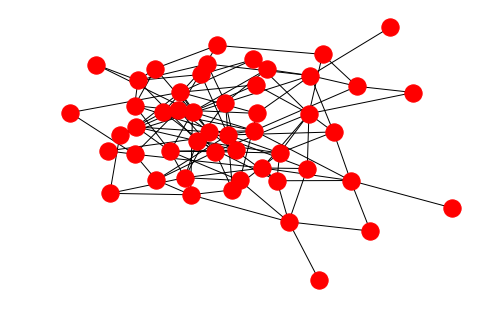

In [13]:
# One more graph generator. This will create
# a Erdos-Reyni Graph
G = nx.erdos_renyi_graph(50, 0.1, seed=1)

# Let's checkout nodes and edges
print(G.nodes())
print(G.edges())
nx.draw(G)

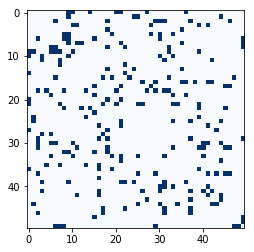

In [14]:
matrix = nx.to_numpy_matrix(G)
# print matrix

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.show()

Adding attributes and weights.

In [15]:
G.add_edge(1, 2, weight=4.7, flow_capacity=100)

In [16]:
G.add_edges_from([(3, 4), (4, 5)], color='red')

G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])

In [17]:
G[1][2]['weight'] = 4.1

In [18]:
G.edges(data=True)

EdgeDataView([(0, 9, {}), (0, 10, {}), (0, 14, {}), (0, 20, {}), (0, 21, {}), (0, 27, {}), (0, 36, {}), (1, 9, {}), (1, 24, {}), (1, 25, {}), (1, 44, {}), (1, 2, {'weight': 4.1, 'flow_capacity': 100, 'color': 'blue'}), (2, 6, {}), (2, 18, {}), (2, 29, {}), (2, 30, {}), (2, 31, {}), (2, 37, {}), (2, 46, {}), (2, 3, {'weight': 8}), (3, 10, {}), (3, 11, {}), (3, 28, {}), (3, 39, {}), (3, 41, {}), (3, 4, {'color': 'red'}), (4, 18, {}), (4, 35, {}), (4, 5, {'color': 'red'}), (5, 8, {}), (5, 9, {}), (5, 19, {}), (5, 28, {}), (5, 30, {}), (5, 33, {}), (6, 8, {}), (6, 9, {}), (6, 15, {}), (6, 30, {}), (6, 49, {}), (7, 9, {}), (7, 11, {}), (7, 12, {}), (7, 21, {}), (7, 35, {}), (7, 49, {}), (8, 18, {}), (8, 22, {}), (8, 32, {}), (8, 49, {}), (9, 10, {}), (9, 32, {}), (9, 39, {}), (10, 30, {}), (10, 33, {}), (11, 31, {}), (11, 42, {}), (12, 22, {}), (13, 18, {}), (13, 24, {}), (13, 35, {}), (14, 22, {}), (15, 17, {}), (15, 19, {}), (15, 23, {}), (15, 32, {}), (15, 47, {}), (16, 26, {}), (16, 29,

### Exercise 

In [19]:
G = nx.Graph()
list_of_cities = [('Paris', 'Warsaw', 841), ('Warsaw', 'Berlin', 584), ('Berlin', 'London', 1101), ('Paris', 'Barcelona', 1038)]
G.add_weighted_edges_from(list_of_cities)

# print G.nodes()
print(G.edges())
# Iterate through the edges and find the highest weight.

[('Paris', 'Warsaw'), ('Paris', 'Barcelona'), ('Warsaw', 'Berlin'), ('Berlin', 'London')]


In [20]:
result = max([w['weight'] for u, v, w in G.edges(data=True)])
print(result)

# max(G.edges(data=True), key=lambda x:x[2])

1101


### Now let's try to understand the dynamics of a network.

Let's start with a random erdos reyni graph.

https://en.wikipedia.org/wiki/Erdős–Rényi_model


In [21]:
G = nx.erdos_renyi_graph(20, 0.1, seed=1)

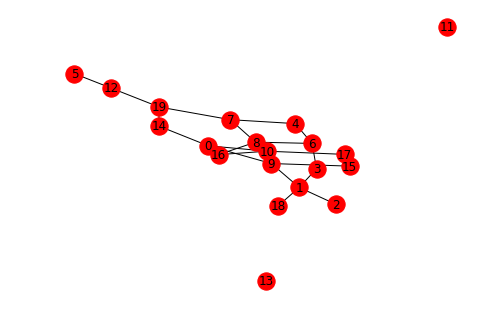

In [22]:
nx.draw_spring(G, with_labels=True)

### Hubs: How do we evaluate the importance of some individuals in a network?

Within a social network, there will be certain individuals which perform certain important functions. For example, there may be hyper-connected individuals who are connected to many, many more people. They would be of use in the spreading of information. Alternatively, if this were a disease contact network, identifying them would be useful in stopping the spread of diseases. How would one identify these people?

#### Approach 1: Neighbors

One way we could compute this is to find out the number of people an individual is conencted to. NetworkX let's us do this by giving us a `G.neighbors(node)` function.

In [23]:
# Let's find out the neighbors of node 12
list(G.neighbors(12))

[5, 19]

#### Approach 2: Degree Centrality

The number of other nodes that one node is connected to is a measure of its centrality. NetworkX implements a **degree centrality**, which is defined as the number of neighbors that a node has normalized to the number of individuals it could be connected to in the entire graph. This is accessed by using `nx.degree_centrality(G)`

In [24]:
nx.degree_centrality(G)
# list(nx.degree_centrality(G).items())[0:5]

{0: 0.15789473684210525,
 1: 0.21052631578947367,
 2: 0.05263157894736842,
 3: 0.10526315789473684,
 4: 0.10526315789473684,
 5: 0.05263157894736842,
 6: 0.15789473684210525,
 7: 0.15789473684210525,
 8: 0.2631578947368421,
 9: 0.21052631578947367,
 10: 0.21052631578947367,
 11: 0.0,
 12: 0.10526315789473684,
 13: 0.0,
 14: 0.10526315789473684,
 15: 0.10526315789473684,
 16: 0.10526315789473684,
 17: 0.10526315789473684,
 18: 0.05263157894736842,
 19: 0.15789473684210525}

There are other measures of centrality, namely betweenness centrality, flow centrality and load centrality. You can take a look at their definitions on the NetworkX API docs and their cited references. You can also define your own measures if those don't fit your needs, but that is an advanced topic that won't be dealt with here.
The NetworkX API docs that document the centrality measures are here: http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.centrality.html?highlight=centrality#module-networkx.algorithms.centrality

Let's work on a read world network.

Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to General Relativity and Quantum Cosmology category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

source: http://snap.stanford.edu/data/index.html#canets

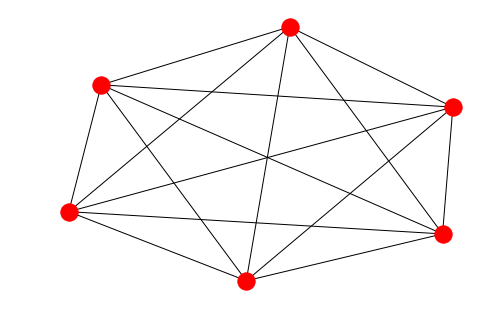

In [25]:
nx.draw(nx.complete_graph(6))

In [26]:
import csv
authors_graph = nx.Graph()
with open('CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [27]:
print(authors_graph.number_of_edges())
print(authors_graph.number_of_nodes())

14496
5242


Neighbors of a node.

In [28]:
# Neighbors/ degree of node is one way of calculating the importance
# of the node. Influential nodes.
# print(list(authors_graph.neighbors('22504')))
print(len(list(authors_graph.neighbors('22504'))))
print(nx.degree(authors_graph,['22504']))
print(authors_graph.degree(['22504']))

33
[('22504', 33)]
[('22504', 33)]


### Exercise 

Create a list of (node, degree of node) tuples and find the node with maximum degree.

In [29]:
result = [(node, len(list(authors_graph.neighbors(node)))) for node in authors_graph.nodes()]

In [30]:
max(result, key=lambda node:node[1])

('21012', 81)

In [31]:
authors_graph.degree()['21012']
# returns a dictionary of degree keyed by node

81

In [32]:
authors_graph.degree()

DegreeView({'3466': 8, '937': 5, '5233': 2, '8579': 5, '10310': 13, '15931': 10, '17038': 17, '18720': 3, '19607': 4, '1854': 8, '4583': 3, '9572': 34, '10841': 7, '13056': 10, '14982': 2, '16310': 17, '19640': 25, '23855': 8, '24372': 1, '24814': 21, '5052': 29, '899': 3, '1796': 2, '2287': 14, '3096': 12, '3386': 11, '4472': 4, '5346': 20, '5740': 1, '6094': 4, '6376': 2, '9124': 24, '10235': 13, '10427': 8, '10597': 6, '15159': 4, '16148': 18, '16741': 7, '18235': 1, '18549': 1, '19297': 16, '20511': 32, '20595': 9, '20613': 10, '24371': 22, '24559': 23, '24731': 1, '25102': 7, '25271': 16, '25396': 23, '1658': 6, '4822': 2, '6864': 2, '7689': 32, '7926': 9, '10268': 7, '12971': 1, '18600': 4, '20421': 3, '20886': 2, '21048': 6, '22393': 5, '23186': 6, '23214': 4, '23298': 2, '23945': 3, '24939': 3, '339': 30, '624': 17, '3731': 9, '4743': 25, '5407': 9, '6610': 68, '6700': 31, '8045': 15, '9099': 9, '9639': 31, '9785': 68, '12141': 5, '15184': 13, '15784': 11, '18719': 22, '19870':

In [33]:
nx.degree_centrality(authors_graph)

{'3466': 0.0015264262545315779,
 '937': 0.0009540164090822362,
 '5233': 0.00038160656363289447,
 '8579': 0.0009540164090822362,
 '10310': 0.002480442663613814,
 '15931': 0.0019080328181644724,
 '17038': 0.003243655790879603,
 '18720': 0.0005724098454493417,
 '19607': 0.0007632131272657889,
 '1854': 0.0015264262545315779,
 '4583': 0.0005724098454493417,
 '9572': 0.006487311581759206,
 '10841': 0.0013356229727151307,
 '13056': 0.0019080328181644724,
 '14982': 0.00038160656363289447,
 '16310': 0.003243655790879603,
 '19640': 0.004770082045411181,
 '23855': 0.0015264262545315779,
 '24372': 0.00019080328181644724,
 '24814': 0.0040068689181453915,
 '5052': 0.00553329517267697,
 '899': 0.0005724098454493417,
 '1796': 0.00038160656363289447,
 '2287': 0.0026712459454302615,
 '3096': 0.0022896393817973667,
 '3386': 0.0020988360999809196,
 '4472': 0.0007632131272657889,
 '5346': 0.003816065636328945,
 '5740': 0.00019080328181644724,
 '6094': 0.0007632131272657889,
 '6376': 0.00038160656363289447,

### Exercise

Plot degree centrality of authors_graph.

(count vs degree centrality)

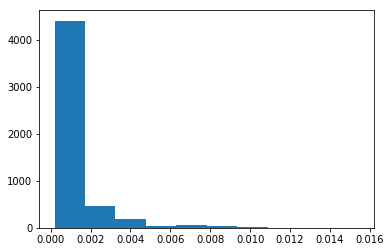

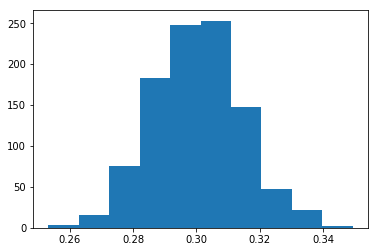

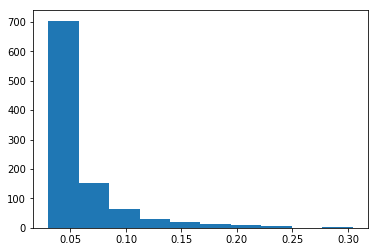

In [34]:
plt.hist(list(nx.degree_centrality(authors_graph).values()))
plt.show()

G = nx.erdos_renyi_graph(1000, 0.3, seed=1)
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

H = nx.barabasi_albert_graph(1000, 30, 0.3)
# K = nx.powerlaw_cluster_graph(1000, 30, 0.3)

plt.hist(list(nx.degree_centrality(H).values()))
plt.show()

# plt.hist(list(nx.degree_centrality(K).values()))
# plt.show()

#### Let's have a look at Connected Components of a graph.

In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

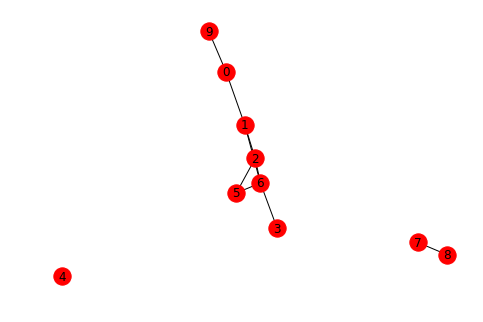

In [35]:
G = nx.erdos_renyi_graph(10, 0.15, seed=1)
nx.draw(G, with_labels=True)

In [36]:
print([len(c) for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)])

[4158, 14, 12, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [37]:
graphs = [c for c in sorted(nx.connected_component_subgraphs(authors_graph), key=len, reverse=True)]

In [38]:
len(graphs[0])

4158

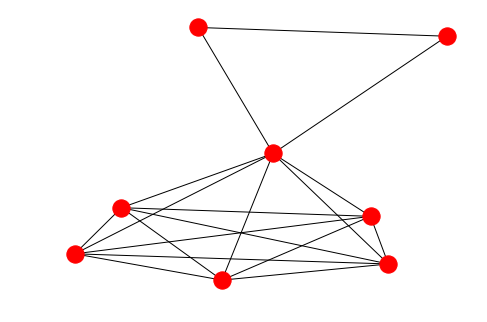

In [39]:
nx.draw(graphs[10])

### Graph Traversal

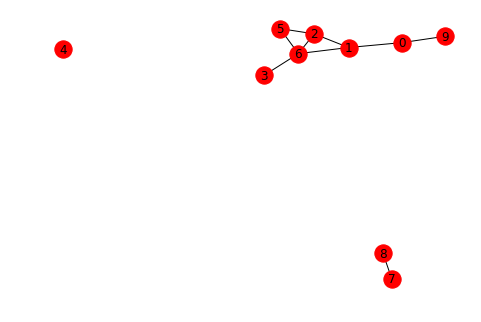

In [40]:
nx.draw(nx.erdos_renyi_graph(10, 0.15, seed=1), with_labels=True)

In [41]:
print(nx.shortest_path(graphs[0], '22504', '23991'))
print(len(nx.shortest_path(graphs[0], '22504', '23991')))
print(nx.shortest_path_length(graphs[0], '22504', '23991'))

['22504', '6512', '18757', '2710', '3677', '23991']
6
5


### Excersise - 4
##### Six degrees of separation, Erdos Number, Bacon Number!!

Find the '22504' number of the graph authors_graph, if there is no connection between nodes then give it the number `-1`.
Also plot a histogram of the '22504' number.

Find the average shortest path length in the first component i.e. graphs[0]

HINT: `nx.shortest_path_length`

In [42]:
# G = nx.fast_gnp_random_graph(10000, 0.1, seed=1)

In [43]:
d = {}
for node in authors_graph.nodes():
    try:
        d[node] = nx.shortest_path_length(authors_graph, '22504', node)
    except:
        d[node] = -1

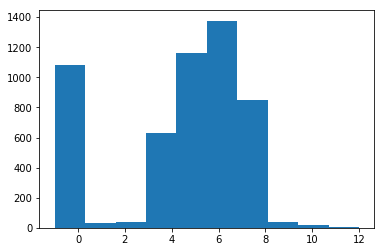

In [44]:
plt.hist(list(d.values()))
plt.show()
# list(d.values())

In [45]:
# print(sum([1 for _, val in d.items() if val == -1]))
# print(len(authors_graph.nodes()) - len(graphs[0]))
# print((sum(val for _, val in d.items() if val != -1))/len(graphs[0]))

### Directed Graphs

![title](images/pagerank.png)

In [46]:
G = nx.DiGraph()

G.add_edge(1, 2)

# print(G.edges())
# G[2][1]
G.is_directed()
# type(G)

True

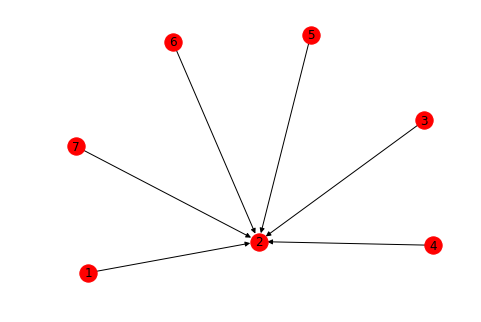

In [47]:
G.add_edges_from([(1, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2)])
nx.draw(G, with_labels=True)

In [48]:
G.in_degree()

InDegreeView({1: 0, 2: 6, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0})

In [49]:
nx.pagerank(G)

{1: 0.0826448180198328,
 2: 0.5041310918810031,
 3: 0.0826448180198328,
 4: 0.0826448180198328,
 5: 0.0826448180198328,
 6: 0.0826448180198328,
 7: 0.0826448180198328}

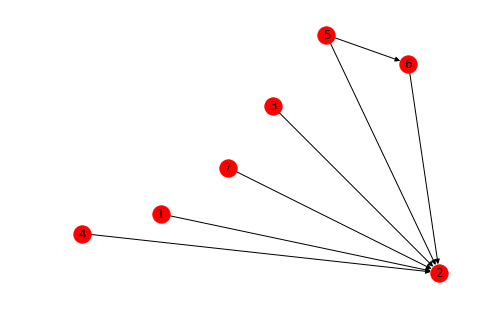

In [50]:
G.add_edge(5, 6)
nx.draw(G, with_labels=True)

In [51]:
nx.pagerank(G)

{1: 0.08024854052495894,
 2: 0.4844028780560986,
 3: 0.08024854052495894,
 4: 0.08024854052495894,
 5: 0.08024854052495894,
 6: 0.11435441931910648,
 7: 0.08024854052495894}

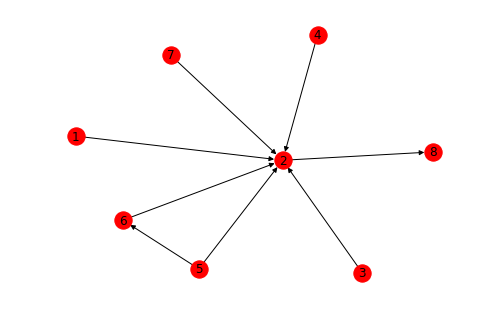

In [52]:
G.add_edge(2, 8)
nx.draw(G, with_labels=True)

In [53]:
nx.pagerank(G)

{1: 0.05378612718073915,
 2: 0.3246687852772877,
 3: 0.05378612718073915,
 4: 0.05378612718073915,
 5: 0.05378612718073915,
 6: 0.0766454192258098,
 7: 0.05378612718073915,
 8: 0.3297551595932067}

In [ ]:
%%time
deg_centrality = nx.degree_centrality(authors_graph)
btw_centrality = nx.betweenness_centrality(authors_graph)

deg_cent_sorted = [i[1] for i in sorted(zip(deg_centrality.keys(), deg_centrality.values()))]
btw_cent_sorted = [i[1] for i in sorted(zip(btw_centrality.keys(), btw_centrality.values()))]

plt.scatter(deg_cent_sorted, btw_cent_sorted)
plt.xlabel('degree')
plt.ylabel('betweeness')
plt.title('centrality scatterplot')